### Part I Review the online programming. 

##### machine learning

In [84]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data = load_boston()

In [4]:
X, y = data['data'], data['target']

In [17]:
X_rm = X[:,5]

## loss1

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [16]:
def loss1(y, y_pred):
    loss = sum([(y_i - y_pred_i)**2 for y_i, y_pred_i in zip(y, y_pred)])
    loss = loss / len(y)
    return loss

In [20]:
def gradient_k(x, y, y_pred):
    gradient = sum([(y_i - y_pred_i) * x_i for y_i, y_pred_i, x_i in zip(y, y_pred, x)])
    gradient *= -2 / len(y)
    return gradient

In [21]:
def gradient_b(y, y_pred):
    gradient = sum([(y_i - y_pred_i) for y_i, y_pred_i in zip(y, y_pred)])
    gradient *= -2 / len(y)
    return gradient

In [23]:
def price(rm, k, b):
    return k * rm + b  

In [47]:
iter_times = 5000

min_loss = float('inf')

current_k = random.random()*200 - 100
current_b = random.random()*200 - 100

lr = 0.01
for i in range(iter_times):
    y_pred = [price(x_i, current_k, current_b) for x_i in X_rm]
    current_loss = loss1(y, y_pred)
    
    if current_loss < min_loss:
        if i % 100 ==0:
            min_loss = current_loss
            print('Time is {}, current_k is {}, current_b is {}, loss is {}.'.format(i, current_k, current_b, min_loss))
    if i > 500: 
        lr = 0.001
    if i > 1500:
        lr = 0.0001
    if i > 3000:
        lr = 0.00001
    current_k = current_k - lr * gradient_k(X_rm, y, y_pred) 
    current_b = current_b - lr * gradient_b(y, y_pred) 

Time is 0, current_k is -26.623826467033382, current_b is -17.351731522082517, loss is 43606.58964795836.
Time is 100, current_k is 5.667149823802803, current_b is -12.820440217930036, loss is 49.48285604876344.
Time is 200, current_k is 5.748775509362682, current_b is -13.33967083639744, loss is 49.206612764870286.
Time is 300, current_k is 5.828461505907973, current_b is -13.846562864140978, loss is 48.94334234812143.
Time is 400, current_k is 5.906253906692874, current_b is -14.341409505790036, loss is 48.69243557001528.
Time is 500, current_k is 5.982197709647498, current_b is -14.82449699848827, loss is 48.453311812484685.
Time is 600, current_k is 5.9903649286900835, current_b is -14.876449642629058, loss is 48.427938220127544.
Time is 700, current_k is 5.997838909886353, current_b is -14.923992519020654, loss is 48.404776632551176.
Time is 800, current_k is 6.005294939607828, current_b is -14.971421203962636, loss is 48.38172617325183.
Time is 900, current_k is 6.012733060971482

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

## loss2

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum{sign*xi} ,\ sign = \begin{cases}-1& \text{yi>kxi+b}\\1& \text{yi<kxi+b}\end{cases}  $$

$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum{sign} ,\ sign = \begin{cases}-1& \text{yi>kxi+b}\\1& \text{yi<kxi+b}\end{cases}  $$

In [49]:
def loss2(y, y_pred):
    loss = sum([abs(y_i - y_pred_i) for y_i, y_pred_i in zip(y, y_pred)])
    loss = loss / len(y)
    return loss

In [68]:
def gradient_k2(x, y, y_pred):
    gradient = sum([(1 if y_i < y_pred_i else -1) * x_i for y_i, y_pred_i, x_i in zip(y, y_pred, x)])
    gradient *= 1 / len(y)
    return gradient

In [69]:
def gradient_b2(y, y_pred):
    gradient = sum([(1 if y_i < y_pred_i else -1) for y_i, y_pred_i in zip(y, y_pred)])
    gradient *= 1 / len(y)
    return gradient

In [73]:
iter_times = 5000

min_loss = float('inf')

current_k = random.random()*200 - 100
current_b = random.random()*200 - 100

lr = 0.01
for i in range(iter_times):
    y_pred = [price(x_i, current_k, current_b) for x_i in X_rm]
    current_loss = loss2(y, y_pred)
    
    if current_loss < min_loss:
        if i % 100 ==0:
            min_loss = current_loss
            print('Time is {}, current_k is {}, current_b is {}, loss is {}.'.format(i, current_k, current_b, min_loss))
    if i > 500: 
        lr = 0.001
    if i > 1500:
        lr = 0.0001
    if i > 3000:
        lr = 0.00001
    current_k = current_k - lr * gradient_k2(X_rm, y, y_pred) 
    current_b = current_b - lr * gradient_b2(y, y_pred) 

Time is 0, current_k is -8.367052557629066, current_b is -31.723872341216094, loss is 106.84054488978202.
Time is 100, current_k is -2.0824181702772857, current_b is -30.723872341215937, loss is 66.34391550709748.
Time is 200, current_k is 4.202216217074505, current_b is -29.72387234121578, loss is 25.84728612441269.
Time is 300, current_k is 8.214672580710864, current_b is -29.089761669279007, loss is 4.511236380272648.
Time is 400, current_k is 8.232608035256344, current_b is -29.102370364931073, loss is 4.50921085074195.
Time is 500, current_k is 8.234836098497485, current_b is -29.117390127776797, loss is 4.508981055702727.
Time is 600, current_k is 8.235160234861079, current_b is -29.119014633705568, loss is 4.508954978555847.
Time is 700, current_k is 8.235383041185154, current_b is -29.12051660999007, loss is 4.508931867289545.
Time is 800, current_k is 8.235605847509229, current_b is -29.12201858627457, loss is 4.508908816933041.
Time is 900, current_k is 8.235854053042791, cur

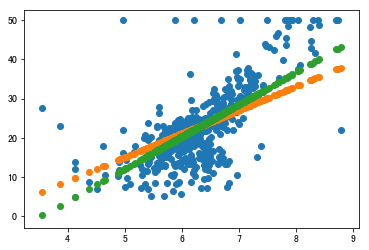

In [80]:
X_rm = X[:, 5]

k1 = 6.069410530558807
b1 = -15.379268044262211

k2 = 8.237639538081417
b2 = -29.135070799714647
price_by_random_k_and_b1 = [price(r, k1, b1) for r in X_rm]
price_by_random_k_and_b2 = [price(r, k2, b2) for r in X_rm]

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b1)
plt.scatter(X_rm, price_by_random_k_and_b2)

## Dynamic Programming

In [85]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [86]:
price = defaultdict(int)

In [87]:
for i,p in enumerate(original_price):
    price[i + 1] = p

In [92]:
price[12]

0

In [99]:
def r(n):
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [137]:
from functools import wraps

In [218]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
       # print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [219]:
def memo(f):
    already_computed = {}
    @wraps(f)
    def _wrap(n):
        if n in already_computed:
            result = already_computed[n]
        else:
            result = f(n)
            already_computed[n] = result
        return result
    return _wrap

In [224]:
@memo
@get_call_time
def r(n):
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [221]:
r(50)

157

In [222]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 1,
             ('r', 2): 1,
             ('r', 3): 1,
             ('r', 4): 1,
             ('r', 5): 1,
             ('r', 6): 1,
             ('r', 7): 1,
             ('r', 8): 1,
             ('r', 9): 1,
             ('r', 10): 1,
             ('r', 11): 1,
             ('r', 12): 1,
             ('r', 13): 1,
             ('r', 14): 1,
             ('r', 15): 1,
             ('r', 16): 1,
             ('r', 17): 1,
             ('r', 18): 1,
             ('r', 19): 1,
             ('r', 20): 1,
             ('r', 21): 1,
             ('r', 22): 1,
             ('r', 23): 1,
             ('r', 24): 1,
             ('r', 25): 1,
             ('r', 26): 1,
             ('r', 27): 1,
             ('r', 28): 1,
             ('r', 29): 1,
             ('r', 30): 1,
             ('r', 31): 1,
             ('r', 32): 1,
             ('r', 33): 1,
             ('r', 34): 1,
             ('r', 35): 1,
             ('r', 36): 1,
             ('r', 3

In [226]:
solution = {}

In [227]:
@memo
@get_call_time
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)])
    solution[n] = (n - max_split, max_split)
    return max_price

In [236]:
r(300)

953

In [229]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (2, 3),
 6: (6, 0),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (10, 0),
 11: (11, 0),
 12: (1, 11),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (2, 14),
 17: (6, 11),
 18: (1, 17),
 19: (2, 17),
 20: (3, 17),
 21: (10, 11),
 22: (11, 11),
 23: (1, 22),
 24: (2, 22),
 25: (3, 22),
 26: (2, 24),
 27: (2, 25),
 28: (6, 22),
 29: (1, 28),
 30: (2, 28)}

In [ ]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [233]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return [left_split]
    else:
        return parse_solution(right_split) + parse_solution(left_split)

In [238]:
parse_solution(200)

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2]

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [392]:
solution_string = {}

In [393]:
from functools import lru_cache

In [394]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution_string[(string1, string2)] = operation 
    
    return min_distance

In [395]:
edit_distance('ABCDF', 'ACDEFG')

3

In [396]:
solution_string

{('A', 'A'): '',
 ('A', 'AC'): 'ADD C',
 ('A', 'ACD'): 'ADD D',
 ('A', 'ACDE'): 'ADD E',
 ('A', 'ACDEF'): 'ADD F',
 ('A', 'ACDEFG'): 'ADD G',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AC'): 'SUB B => C',
 ('AB', 'ACD'): 'ADD D',
 ('AB', 'ACDE'): 'ADD E',
 ('AB', 'ACDEF'): 'ADD F',
 ('AB', 'ACDEFG'): 'ADD G',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AC'): '',
 ('ABC', 'ACD'): 'ADD D',
 ('ABC', 'ACDE'): 'ADD E',
 ('ABC', 'ACDEF'): 'ADD F',
 ('ABC', 'ACDEFG'): 'ADD G',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AC'): 'DEL D',
 ('ABCD', 'ACD'): '',
 ('ABCD', 'ACDE'): 'ADD E',
 ('ABCD', 'ACDEF'): 'ADD F',
 ('ABCD', 'ACDEFG'): 'ADD G',
 ('ABCDF', 'A'): 'DEL F',
 ('ABCDF', 'AC'): 'DEL F',
 ('ABCDF', 'ACD'): 'DEL F',
 ('ABCDF', 'ACDE'): 'SUB F => E',
 ('ABCDF', 'ACDEF'): '',
 ('ABCDF', 'ACDEFG'): 'ADD G'}

In [397]:
option = []
def parse_solution_string(string):
    left_string, right_string = string
    op = solution_string[string]
    if op or left_string != right_string:
        if op[:3] == 'DEL':
            new_string = left_string[:-1]
            option.append(op)
            string = (new_string, right_string)
            parse_solution_string(string)
        elif op[:3] == 'ADD':
            new_string = right_string[:-1]
            option.insert(0, op)
            string = (left_string, new_string)
            parse_solution_string(string)
        elif op[:3] == 'SUB':
            if option[0][:3] == 'DEL':
                option.append(op)
            else:
                option.insert(0, op)
            string = (left_string[:-1], right_string[:-1])
            parse_solution_string(string)
        else:
            string = (left_string[:-1], right_string[:-1])
            parse_solution_string(string)
    else:
        print(option)
        return option
        

In [402]:
option = []
parse_solution_string(('ABCDF', 'ACDEFG'))

['ADD E', 'ADD G', 'DEL B']


In [403]:
option = []
parse_solution_string(('ABCDF', 'A'))

['DEL F', 'DEL D', 'DEL C', 'DEL B']


In [404]:
option = []
parse_solution_string(('AB', 'ACDEFG'))

['SUB B => C', 'ADD D', 'ADD E', 'ADD F', 'ADD G']


### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 因为求解的问题可以分解为多个子问题，需要分析子问题的重复性；而搜索问题主要是考虑后继节点。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: 因为一些场景使用动态规划更好，用动态规划更方便；机器学习并不是在所有场景都适用。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 0-1背包问题，编辑距离问题，最长公共子序列问题。

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 拼写检查，论文查查，基因序列对比。

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 最优子结构，边界，状态转移公式。最优子结构指的是，问题的最优解包含子问题的最优解；边界是子问题无需再简化；状态转移公式是问题每个阶段和下个阶段的关系。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 没有统一的标准模型；数值方法求解时存在维数灾。